# PART 1 - EDA and Resampling

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

In [32]:
import os
import pandas as pd
import numpy as np
import imblearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz

In [5]:
import warnings
warnings.filterwarnings("ignore")
STATE = 1996

## Exploratory Data Analysis

In [3]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [18]:
# Get counts for each class = 0, 1 and 2 (healthy, prediabetes and diabetes)
df['Diabetes_012'] = df['Diabetes_012'].astype(int)
display(df['Diabetes_012'].value_counts())

print('Shape = ')
print(df.shape)

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64

Shape = 
(253680, 22)


In [13]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

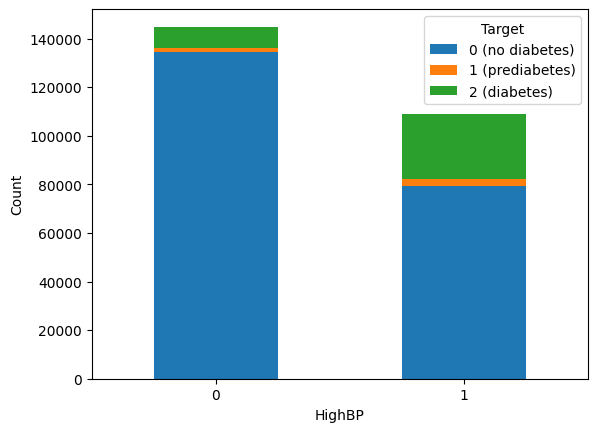

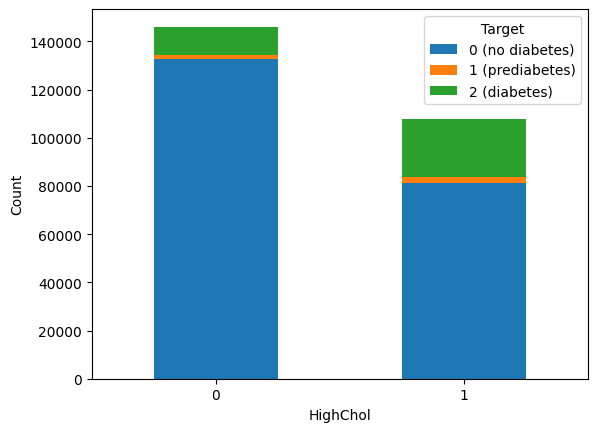

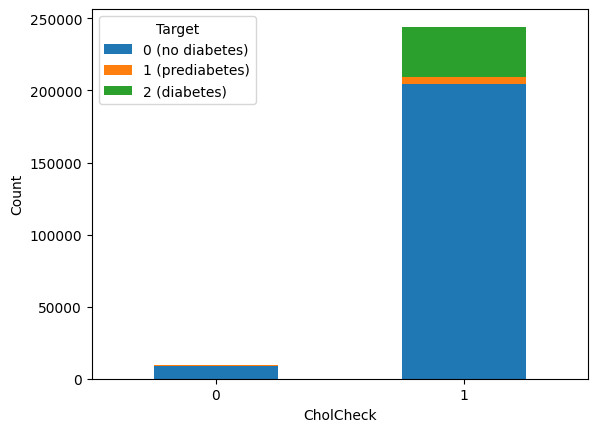

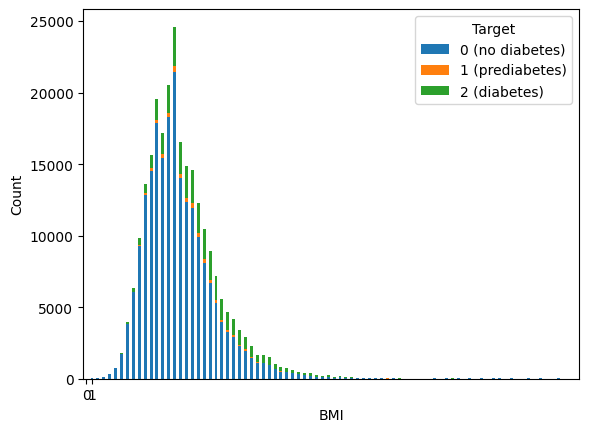

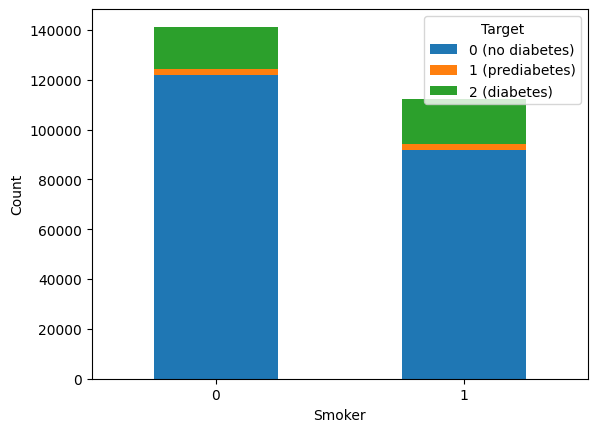

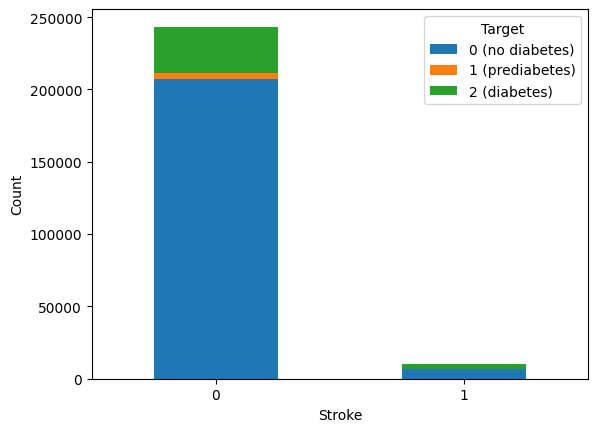

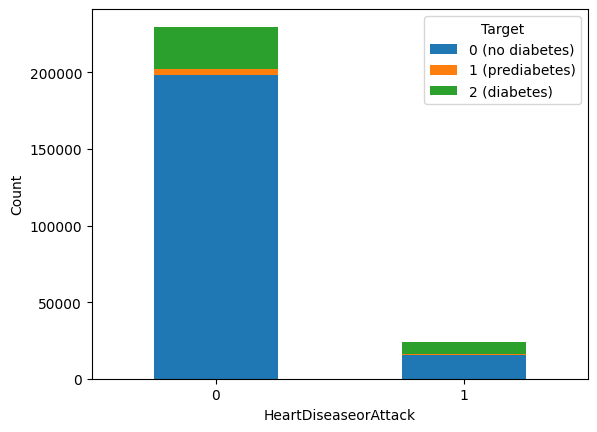

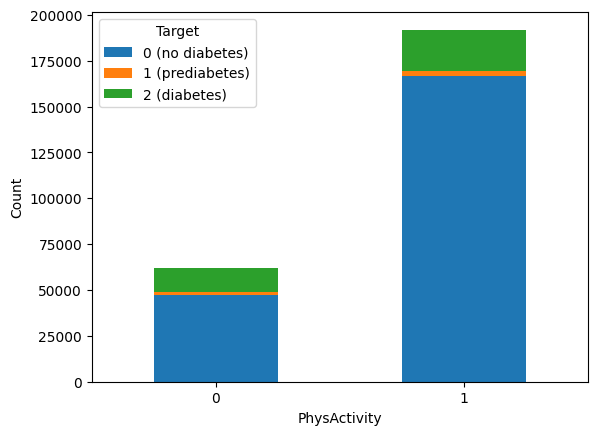

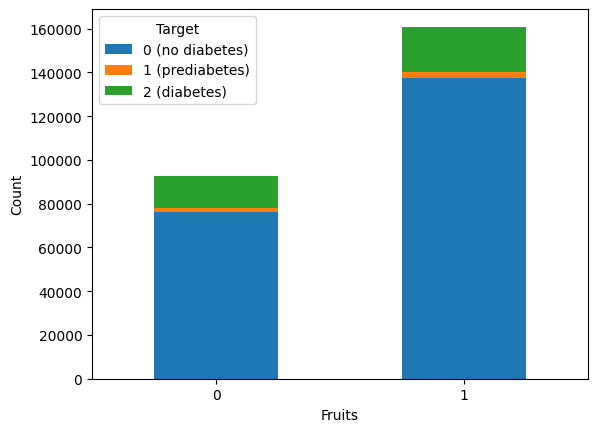

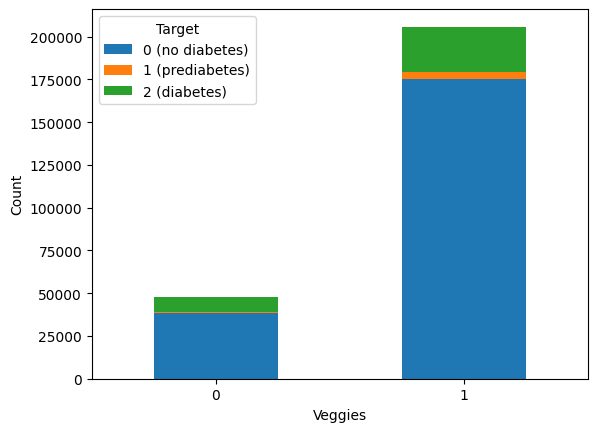

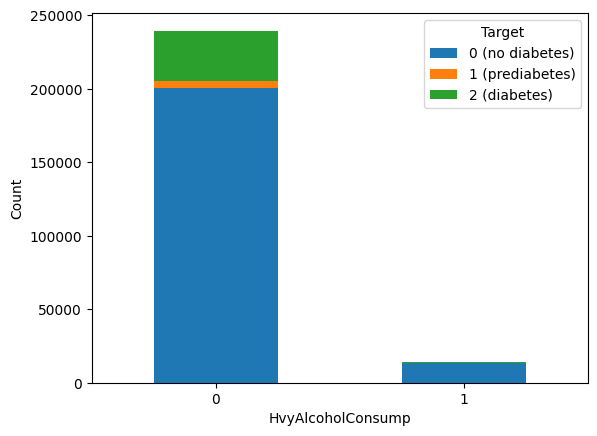

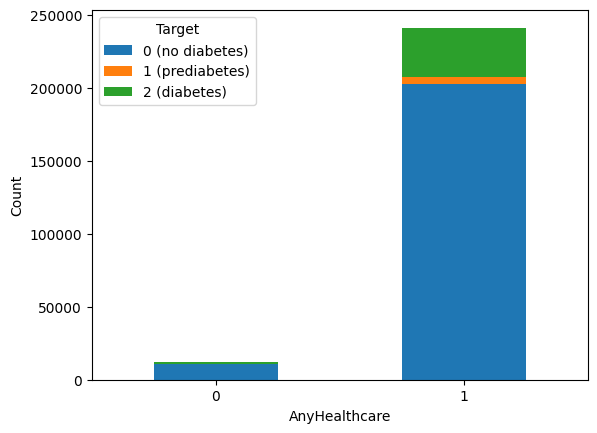

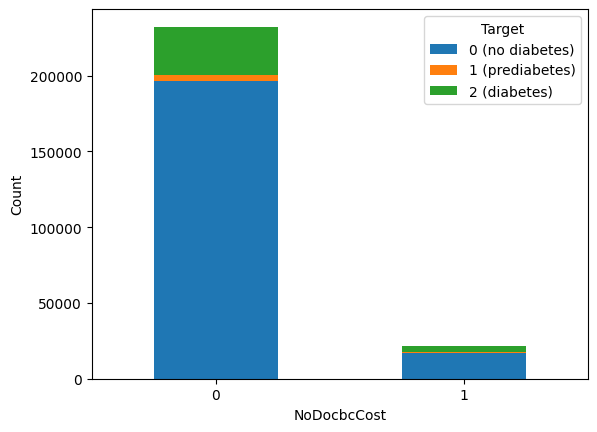

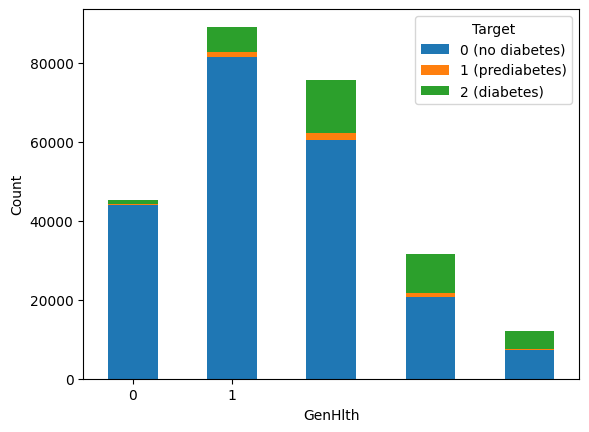

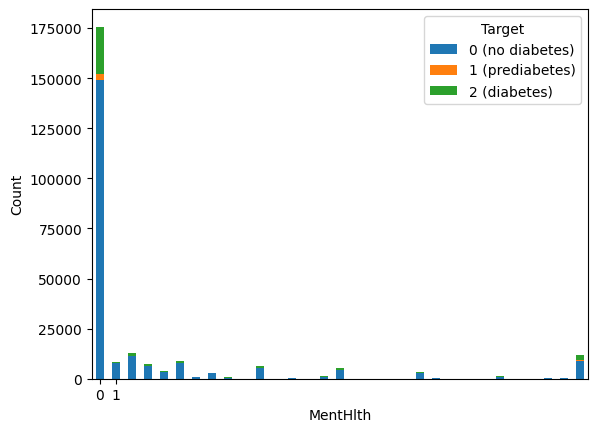

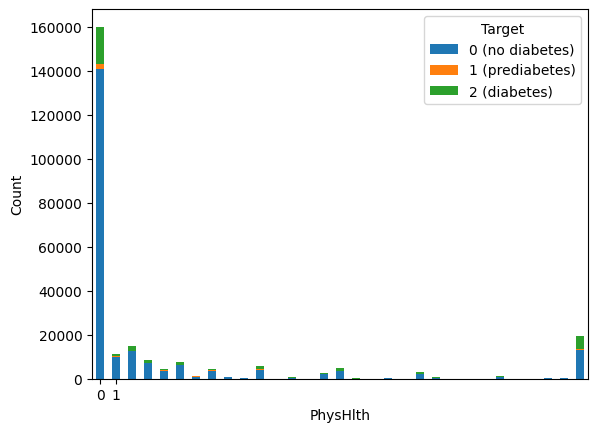

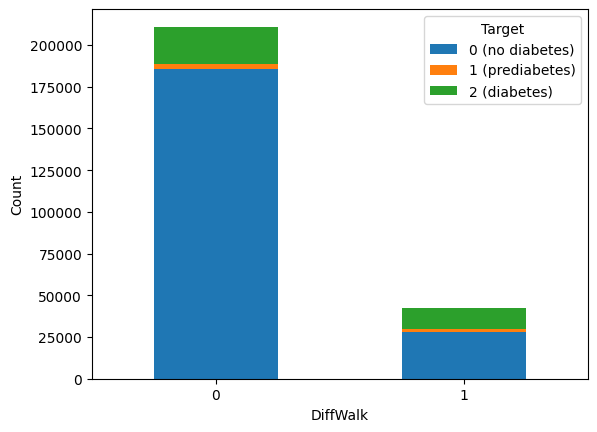

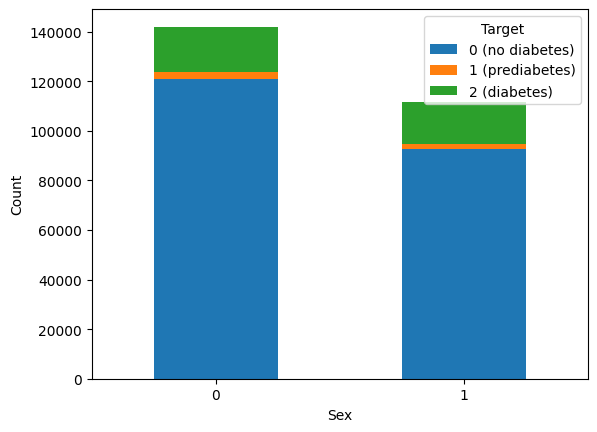

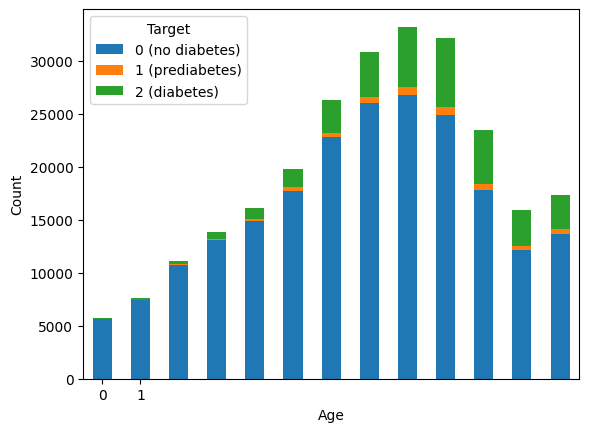

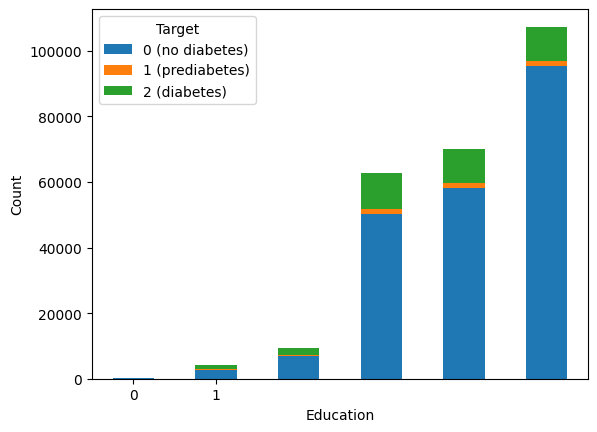

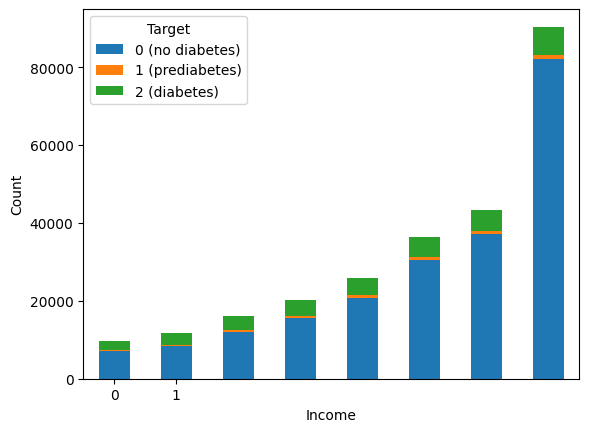

In [12]:
for i in range(0, 21):
    ctab = pd.crosstab(X.iloc[:, i], y)
    ctab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.xlabel(f'''{df.drop(columns = 'Diabetes_012').columns[i]}''')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
    plt.legend(title='Target', labels=['0 (no diabetes)', '1 (prediabetes)', '2 (diabetes)'])
    plt.show()

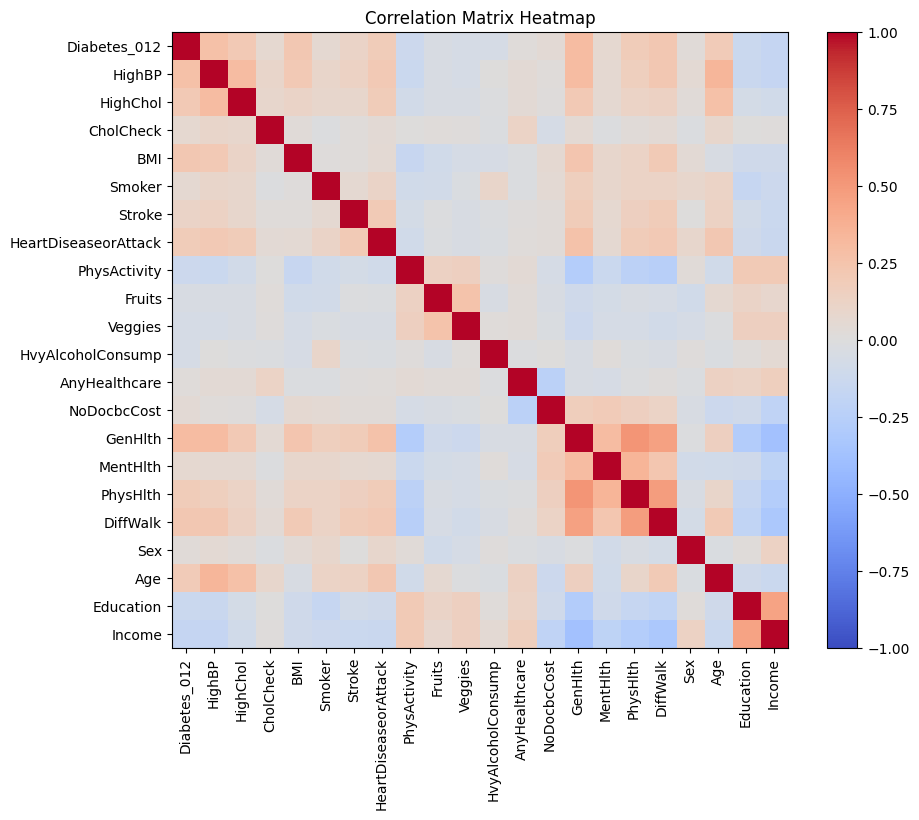

In [6]:
Corr_Matrix = round(df.corr(),2)
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(Corr_Matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar(heatmap)
plt.xticks(range(len(Corr_Matrix.columns)), Corr_Matrix.columns, rotation=90)
plt.yticks(range(len(Corr_Matrix.index)), Corr_Matrix.index)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Modeling on Imbalanced Dataset

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=STATE)

#### 1. AdaBoost

n_estimators = 25: Training Accuracy = 0.8479, Testing Accuracy = 0.8460
n_estimators = 50: Training Accuracy = 0.8486, Testing Accuracy = 0.8479
n_estimators = 100: Training Accuracy = 0.8489, Testing Accuracy = 0.8485
              precision    recall  f1-score   support

           0       0.87      0.97      0.92    171009
           1       0.00      0.00      0.00      3646
           2       0.54      0.21      0.30     28289

    accuracy                           0.85    202944
   macro avg       0.47      0.39      0.41    202944
weighted avg       0.81      0.85      0.81    202944

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     42694
           1       0.00      0.00      0.00       985
           2       0.54      0.21      0.31      7057

    accuracy                           0.85     50736
   macro avg       0.47      0.40      0.41     50736
weighted avg       0.80      0.85      0.81     50736



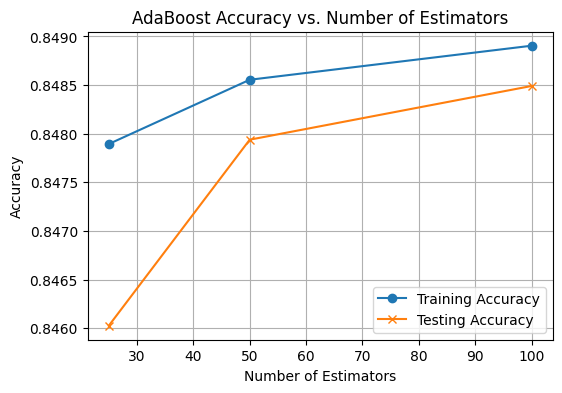

In [24]:
n_estimators_list = [25,50,100]

train_accuracies = []
test_accuracies = []


for n in n_estimators_list:

    ada_clf = AdaBoostClassifier(n_estimators=n, random_state=STATE)
    ada_clf.fit(X_train_scaled, y_train)

    y_train_pred_ada = ada_clf.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred_ada)
    train_accuracies.append(train_accuracy)

    y_test_pred_ada = ada_clf.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred_ada)
    test_accuracies.append(test_accuracy)
    
    print(f'n_estimators = {n}: Training Accuracy = {train_accuracy:.4f}, Testing Accuracy = {test_accuracy:.4f}')
    
# Compute precision, recall for each class using the classification_report function
print(classification_report(y_train, y_train_pred_ada))
print(classification_report(y_test, y_test_pred_ada))

plt.figure(figsize=(6, 4))
plt.plot(n_estimators_list, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_list, test_accuracies, label='Testing Accuracy', marker='x')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

#### 2. Random Forest

n_estimators = 25: Training Accuracy = 0.9908, Testing Accuracy = 0.8372
n_estimators = 50: Training Accuracy = 0.9928, Testing Accuracy = 0.8398
n_estimators = 100: Training Accuracy = 0.9932, Testing Accuracy = 0.8398
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    171009
           1       0.99      0.94      0.97      3646
           2       0.99      0.96      0.98     28289

    accuracy                           0.99    202944
   macro avg       0.99      0.97      0.98    202944
weighted avg       0.99      0.99      0.99    202944

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     42694
           1       0.04      0.00      0.00       985
           2       0.47      0.20      0.28      7057

    accuracy                           0.84     50736
   macro avg       0.46      0.39      0.40     50736
weighted avg       0.79      0.84      0.81     50736



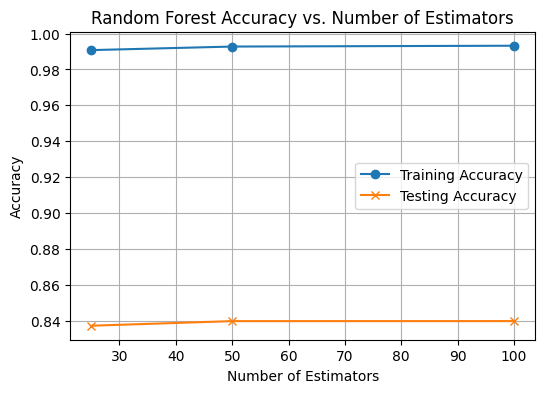

In [26]:
train_accuracies_rf = []
test_accuracies_rf = []

for n in n_estimators_list:

    rf_clf = RandomForestClassifier(n_estimators=n, random_state=STATE)
    
    rf_clf.fit(X_train_scaled, y_train)
    
    y_train_pred_rf = rf_clf.predict(X_train_scaled)
    train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
    train_accuracies_rf.append(train_accuracy_rf)
   
    y_test_pred_rf = rf_clf.predict(X_test_scaled)
    test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
    test_accuracies_rf.append(test_accuracy_rf)
    
    print(f'n_estimators = {n}: Training Accuracy = {train_accuracy_rf:.4f}, Testing Accuracy = {test_accuracy_rf:.4f}')

# Compute precision, recall for each class using the classification_report function
print(classification_report(y_train, y_train_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

plt.figure(figsize=(6, 4))
plt.plot(n_estimators_list, train_accuracies_rf, label='Training Accuracy', marker='o')
plt.plot(n_estimators_list, test_accuracies_rf, label='Testing Accuracy', marker='x')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

#### 3. XGBOOST

In [ ]:
train_accuracies_xgb = []
test_accuracies_xgb = []

for n in n_estimators_list:

    xgb_clf = XGBClassifier(n_estimators=n, random_state=1996)
    xgb_clf.fit(X_train_scaled, y_train)
    
    y_train_pred_xgb = xgb_clf.predict(X_train_scaled)
    train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
    train_accuracies_xgb.append(train_accuracy_xgb)
    
    y_test_pred_xgb = xgb_clf.predict(X_test_scaled)
    test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
    test_accuracies_xgb.append(test_accuracy_xgb)
    
    print(f'n_estimators = {n}: Training Accuracy = {train_accuracy_xgb:.4f}, Testing Accuracy = {test_accuracy_xgb:.4f}')

# Compute precision, recall for each class using the classification_report function
print(classification_report(y_train, y_train_pred_xgb))
print(classification_report(y_test, y_test_pred_xgb))

plt.figure(figsize=(6, 4))
plt.plot(n_estimators_list, train_accuracies_xgb, label='Training Accuracy', marker='o')
plt.plot(n_estimators_list, test_accuracies_xgb, label='Testing Accuracy', marker='x')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

## Balancing Methods

#### 1. Random undersampling: 3 classes

In [46]:
print('Before Random Undersampling:', Counter(y_train))

rus = RandomUnderSampler(random_state=STATE)
X_resamp, y_resamp = rus.fit_resample(X_train, y_train)

print('After Random Undersampling:', Counter(y_resamp))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=STATE)
rf_clf.fit(X_resamp, y_resamp)
y_resamp_train_pred = rf_clf.predict(X_resamp)
y_resamp_test_pred = rf_clf.predict(X_test)
print('Training set:')
print(classification_report(y_resamp, y_resamp_train_pred))
print('Testing set:')
print(classification_report(y_test, y_resamp_test_pred))

Before undersampling: Counter({0: 171009, 2: 28289, 1: 3646})
After undersampling: Counter({0: 3646, 1: 3646, 2: 3646})
Training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3646
           1       1.00      1.00      1.00      3646
           2       1.00      1.00      1.00      3646

    accuracy                           1.00     10938
   macro avg       1.00      1.00      1.00     10938
weighted avg       1.00      1.00      1.00     10938

Testing set:
              precision    recall  f1-score   support

           0       0.95      0.59      0.73     42694
           1       0.03      0.37      0.06       985
           2       0.31      0.54      0.40      7057

    accuracy                           0.58     50736
   macro avg       0.43      0.50      0.39     50736
weighted avg       0.84      0.58      0.67     50736



#### 2. Tomek Link undersampling: 3 classes - splitting then resampling

In [49]:
print('Before Tomek Links Undersampling:', Counter(y_train))

tl = TomekLinks()
X_resamp, y_resamp = tl.fit_resample(X_train, y_train)

print('After Tomek Links Undersampling:', Counter(y_resamp))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=STATE)
rf_clf.fit(X_resamp, y_resamp)
y_resamp_train_pred = rf_clf.predict(X_resamp)
y_resamp_test_pred = rf_clf.predict(X_test)
print('Training set:')
print(classification_report(y_resamp, y_resamp_train_pred))
print('Testing set:')
print(classification_report(y_test, y_resamp_test_pred))

Before undersampling: Counter({0: 171009, 2: 28289, 1: 3646})
After undersampling: Counter({0: 161406, 2: 19417, 1: 3646})
Training set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    161406
           1       0.99      0.94      0.97      3646
           2       0.99      0.95      0.97     19417

    accuracy                           0.99    184469
   macro avg       0.99      0.96      0.98    184469
weighted avg       0.99      0.99      0.99    184469

Testing set:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     42694
           1       0.02      0.00      0.00       985
           2       0.52      0.19      0.28      7057

    accuracy                           0.84     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.84      0.81     50736



#### 3. NearMiss undersampling: 3 classes - splitting then resampling

In [51]:
print('Before NearMiss Undersampling:', Counter(y_train))

nm = NearMiss()
X_resamp, y_resamp = nm.fit_resample(X_train, y_train)

print('After NearMiss Undersampling:', Counter(y_resamp))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=STATE)
rf_clf.fit(X_resamp, y_resamp)
y_resamp_train_pred = rf_clf.predict(X_resamp)
y_resamp_test_pred = rf_clf.predict(X_test)
print('Training set:')
print(classification_report(y_resamp, y_resamp_train_pred))
print('Testing set:')
print(classification_report(y_test, y_resamp_test_pred))

Before NearMiss Undersampling: Counter({0: 171009, 2: 28289, 1: 3646})
After NearMiss Undersampling: Counter({0: 3646, 1: 3646, 2: 3646})
Training set:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3646
           1       1.00      0.96      0.98      3646
           2       0.99      0.96      0.98      3646

    accuracy                           0.97     10938
   macro avg       0.97      0.97      0.97     10938
weighted avg       0.97      0.97      0.97     10938

Testing set:
              precision    recall  f1-score   support

           0       0.96      0.06      0.12     42694
           1       0.02      0.76      0.04       985
           2       0.10      0.19      0.14      7057

    accuracy                           0.09     50736
   macro avg       0.36      0.34      0.10     50736
weighted avg       0.82      0.09      0.12     50736



#### 4. Random oversampling: 3 classes - splitting then resampling

In [54]:
print('Before Random Oversampling:', Counter(y_train))

ros = RandomOverSampler(random_state=STATE)
X_resamp, y_resamp = ros.fit_resample(X_train, y_train)

print('After Random Oversampling:', Counter(y_resamp))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=STATE)
rf_clf.fit(X_resamp, y_resamp)
y_resamp_train_pred = rf_clf.predict(X_resamp)
y_resamp_test_pred = rf_clf.predict(X_test)
print('Training set:')
print(classification_report(y_resamp, y_resamp_train_pred))
print('Testing set:')
print(classification_report(y_test, y_resamp_test_pred))

Before Random Oversampling: Counter({0: 171009, 2: 28289, 1: 3646})
After Random Oversampling: Counter({0: 171009, 2: 171009, 1: 171009})
Training set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    171009
           1       1.00      1.00      1.00    171009
           2       0.99      1.00      0.99    171009

    accuracy                           0.99    513027
   macro avg       0.99      0.99      0.99    513027
weighted avg       0.99      0.99      0.99    513027

Testing set:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     42694
           1       0.01      0.00      0.00       985
           2       0.41      0.33      0.36      7057

    accuracy                           0.82     50736
   macro avg       0.43      0.42      0.42     50736
weighted avg       0.80      0.82      0.81     50736



#### SMOTE oversampling: 3 classes - splitting then resampling

In [56]:
print('Before SMOTE Oversampling:', Counter(y_train))

smote = SMOTE(random_state=STATE)
X_resamp, y_resamp = smote.fit_resample(X_train, y_train)

print('After SMOTE Oversampling:', Counter(y_resamp))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=STATE)
rf_clf.fit(X_resamp, y_resamp)
y_resamp_train_pred = rf_clf.predict(X_resamp)
y_resamp_test_pred = rf_clf.predict(X_test)
print('Training set:')
print(classification_report(y_resamp, y_resamp_train_pred))
print('Testing set:')
print(classification_report(y_test, y_resamp_test_pred))

Before SMOTE Oversampling: Counter({0: 171009, 2: 28289, 1: 3646})
After SMOTE Oversampling: Counter({0: 171009, 2: 171009, 1: 171009})
Training set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    171009
           1       1.00      1.00      1.00    171009
           2       1.00      0.99      1.00    171009

    accuracy                           1.00    513027
   macro avg       1.00      1.00      1.00    513027
weighted avg       1.00      1.00      1.00    513027

Testing set:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     42694
           1       0.02      0.00      0.00       985
           2       0.43      0.34      0.38      7057

    accuracy                           0.83     50736
   macro avg       0.44      0.42      0.43     50736
weighted avg       0.80      0.83      0.81     50736



#### ADASYN oversampling: 3 classes - splitting then resampling

In [57]:
print('Before ADASYN Oversampling:', Counter(y_train))

adasyn = ADASYN(random_state=STATE)
X_resamp, y_resamp = adasyn.fit_resample(X_train, y_train)

print('After ADASYN Oversampling:', Counter(y_resamp))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=STATE)
rf_clf.fit(X_resamp, y_resamp)
y_resamp_train_pred = rf_clf.predict(X_resamp)
y_resamp_test_pred = rf_clf.predict(X_test)
print('Training set:')
print(classification_report(y_resamp, y_resamp_train_pred))
print('Testing set:')
print(classification_report(y_test, y_resamp_test_pred))

Before ADASYN Oversampling: Counter({0: 171009, 2: 28289, 1: 3646})
After ADASYN Oversampling: Counter({1: 172338, 0: 171009, 2: 169506})
Training set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    171009
           1       1.00      1.00      1.00    172338
           2       1.00      0.99      1.00    169506

    accuracy                           1.00    512853
   macro avg       1.00      1.00      1.00    512853
weighted avg       1.00      1.00      1.00    512853

Testing set:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     42694
           1       0.01      0.00      0.00       985
           2       0.43      0.33      0.37      7057

    accuracy                           0.83     50736
   macro avg       0.44      0.42      0.43     50736
weighted avg       0.80      0.83      0.81     50736



#### SMOTEENN Hybrid: 3 classes - splitting then resampling

In [60]:
print('Before SMOTEENN Oversampling:', Counter(y_train))

sme = SMOTEENN(random_state=STATE)
X_resamp, y_resamp = sme.fit_resample(X_train, y_train)

print('After SMOTEENN Oversampling:', Counter(y_resamp))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=STATE)
rf_clf.fit(X_resamp, y_resamp)
y_resamp_train_pred = rf_clf.predict(X_resamp)
y_resamp_test_pred = rf_clf.predict(X_test)
print('Training set:')
print(classification_report(y_resamp, y_resamp_train_pred))
print('Testing set:')
print(classification_report(y_test, y_resamp_test_pred))

Before SMOTEENN Oversampling: Counter({0: 171009, 2: 28289, 1: 3646})
After SMOTEENN Oversampling: Counter({1: 167168, 2: 149732, 0: 105671})
Training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105671
           1       1.00      1.00      1.00    167168
           2       1.00      1.00      1.00    149732

    accuracy                           1.00    422571
   macro avg       1.00      1.00      1.00    422571
weighted avg       1.00      1.00      1.00    422571

Testing set:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     42694
           1       0.02      0.01      0.01       985
           2       0.33      0.69      0.45      7057

    accuracy                           0.75     50736
   macro avg       0.43      0.49      0.43     50736
weighted avg       0.83      0.75      0.77     50736



#### SMOTETomek Hybrid: 3 classes - splitting then resampling

In [61]:
print('Before SMOTETomek Oversampling:', Counter(y_train))

smt = SMOTETomek(random_state=42)
X_resamp, y_resamp = smt.fit_resample(X_train, y_train)

print('After SMOTETomek Oversampling:', Counter(y_resamp))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=STATE)
rf_clf.fit(X_resamp, y_resamp)
y_resamp_train_pred = rf_clf.predict(X_resamp)
y_resamp_test_pred = rf_clf.predict(X_test)
print('Training set:')
print(classification_report(y_resamp, y_resamp_train_pred))
print('Testing set:')
print(classification_report(y_test, y_resamp_test_pred))

Before SMOTETomek Oversampling: Counter({0: 171009, 2: 28289, 1: 3646})
After SMOTETomek Oversampling: Counter({1: 170832, 2: 169244, 0: 169233})
Training set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    169233
           1       1.00      1.00      1.00    170832
           2       1.00      0.99      1.00    169244

    accuracy                           1.00    509309
   macro avg       1.00      1.00      1.00    509309
weighted avg       1.00      1.00      1.00    509309

Testing set:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     42694
           1       0.02      0.00      0.01       985
           2       0.42      0.35      0.38      7057

    accuracy                           0.83     50736
   macro avg       0.44      0.42      0.43     50736
weighted avg       0.80      0.83      0.81     50736



# PART 2 - Transfer Learning

#### Creating Prediabetes and Diabetes Data

In [3]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

# Identify indices for each class
class0_indices = df[df['Diabetes_012'] == 0].index
class1_indices = df[df['Diabetes_012'] == 1].index
class2_indices = df[df['Diabetes_012'] == 2].index

# Calculate the number of samples for each class
num_class0 = len(class0_indices)
num_class1 = len(class1_indices)
num_class2 = len(class2_indices)

# Determine the number of samples needed for each subset
half_class0_dataset1 = num_class0 // 2  # Half of class 0 for Dataset 1
remaining_class0_dataset2 = num_class0 - half_class0_dataset1  # Remaining half of class 0 for Dataset 2

# Select samples for Prediabetes Dataset
prediabetes_indices = (
    list(class0_indices[:half_class0_dataset1]) + 
    list(class1_indices)
)
df_prediabetes = df.loc[prediabetes_indices]

# Select samples for Dataset 2
diabetes_indices = (
    list(class0_indices[half_class0_dataset1:]) + 
    list(class2_indices)
)
df_diabetes = df.loc[diabetes_indices]

# Convert df_diabetes from 0/2 classification to 0/1 
df_diabetes.loc[df_diabetes['Diabetes_012'] == 2, 'Diabetes_012'] = 1

#### Creating training/testing source and target sets

In [6]:
X = df_prediabetes.drop(columns=['Diabetes_012'])
y = df_prediabetes['Diabetes_012']

X_train_target, X_test_target, y_train_target, y_test_target = train_test_split(X, y, test_size=0.2, random_state=42)

X = df_diabetes.drop(columns=['Diabetes_012'])
y = df_diabetes['Diabetes_012']

X_train_source, X_test_source, y_train_source, y_test_source = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline

In [26]:
rus = RandomUnderSampler(random_state=STATE)
X_train_source_rus, y_train_source_rus = rus.fit_resample(X_train_source, y_train_source)

In [27]:
sme = SMOTEENN(random_state=STATE)
X_train_source_sme, y_train_source_sme = sme.fit_resample(X_train_source, y_train_source)

In [28]:
rus = RandomUnderSampler(random_state=STATE)
X_train_target_rus, y_train_target_rus = rus.fit_resample(X_train_target, y_train_target)

In [29]:
sme = SMOTEENN(random_state=STATE)
X_train_target_sme, y_train_target_sme = sme.fit_resample(X_train_target, y_train_target)

#### 1.1 Classifying Source with RF Trained on RUS Balanced Source Data

In [33]:
#hyperparameter tuning
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rfc = RandomForestClassifier()
rand_search = RandomizedSearchCV(rfc, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train_source_rus, y_train_source_rus)
best_rf = rand_search.best_estimator_
p = rand_search.best_params_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 431}


In [ ]:
rf_source_rus = RandomForestClassifier(max_depth=p['max_depth'], n_estimators=p['n_estimators'], random_state=42)
rf_source_rus.fit(X_train_source_rus, y_train_source_rus)
y_pred = rf_source_rus.predict(X_test_source)
print('Classification report \n',classification_report(y_test_source, y_pred))

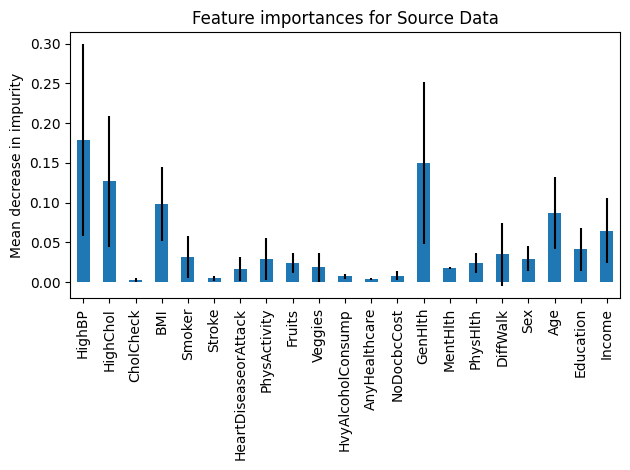

In [25]:
feature_names = X_train_source_rus.columns
importances = rf_source_rus.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_source_rus.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances for Source Data")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### 1.2 Classifying Source with RF Trained on SMOTEENN Balanced Source Data

In [ ]:
#hyperparameter tuning
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rfc = RandomForestClassifier()
rand_search = RandomizedSearchCV(rfc, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train_source_sme, y_train_source_sme)
best_rf = rand_search.best_estimator_
p = rand_search.best_params_
print('Best hyperparameters:',  rand_search.best_params_)

In [ ]:
rf_source_sme = RandomForestClassifier(max_depth=p['max_depth'], n_estimators=p['n_estimators'], random_state=42)
rf_source_sme.fit(X_train_source_sme, y_train_source_sme)
y_pred = rf_source_sme.predict(X_test_source)
print('Classification report \n',classification_report(y_test_source, y_pred))

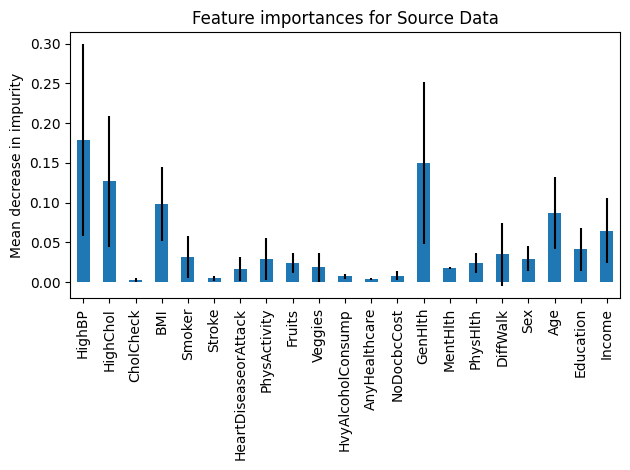

In [25]:
feature_names = X_train_source_sme.columns
importances = rf_source_sme.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_source_sme.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances for Source Data")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### 2.1 Classifying Target with RF Trained on RUS Balanced Source Data

In [ ]:
print("For testing on Prediabetes dataset:")
y_pred = rf_source_rus.predict(X_test_target)
print(classification_report(y_test_target, y_pred))

#### 2.2 Classifying Target with RF Trained on SMOTEENN Balanced Source Data

In [ ]:
print("For testing on Prediabetes dataset:")
y_pred = rf_source_sme.predict(X_test_target)
print(classification_report(y_test_target, y_pred))

#### 3.1 Classifying Target with RF Trained on RUS Balanced Target Data

In [ ]:
#hyperparameter tuning
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rfc = RandomForestClassifier()
rand_search = RandomizedSearchCV(rfc, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train_target_rus, y_train_target_rus)
best_rf = rand_search.best_estimator_
p = rand_search.best_params_
print('Best hyperparameters:',  rand_search.best_params_)

In [ ]:
rf_target_rus = RandomForestClassifier(max_depth=p['max_depth'], n_estimators=p['n_estimators'], random_state=42)
rf_target_rus.fit(X_train_target_rus, y_train_target_rus)
y_pred = rf_target_rus.predict(X_test_target)
print('Classification report \n',classification_report(y_test_target, y_pred))

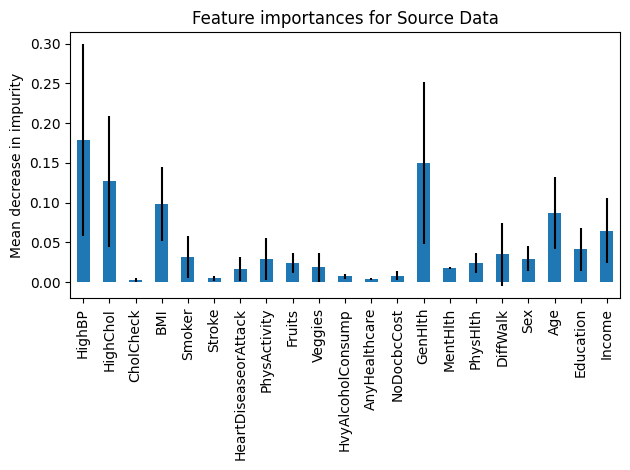

In [25]:
feature_names = X_train_source_sme.columns
importances = rf_target_rus.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_target_rus.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances for Source Data")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### 3.2 Classifying Target with RF Trained on SMOTEENN Balanced Target Data

In [ ]:
#hyperparameter tuning
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rfc = RandomForestClassifier()
rand_search = RandomizedSearchCV(rfc, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train_target_sme, y_train_target_sme)
best_rf = rand_search.best_estimator_
p = rand_search.best_params_
print('Best hyperparameters:', rand_search.best_params_)

In [ ]:
rf_target_sme = RandomForestClassifier(max_depth=p['max_depth'], n_estimators=p['n_estimators'], random_state=42)
rf_target_sme.fit(X_train_target_sme, y_train_target_sme)
y_pred = rf_target_sme.predict(X_test_target)
print('Classification report \n',classification_report(y_test_target, y_pred))

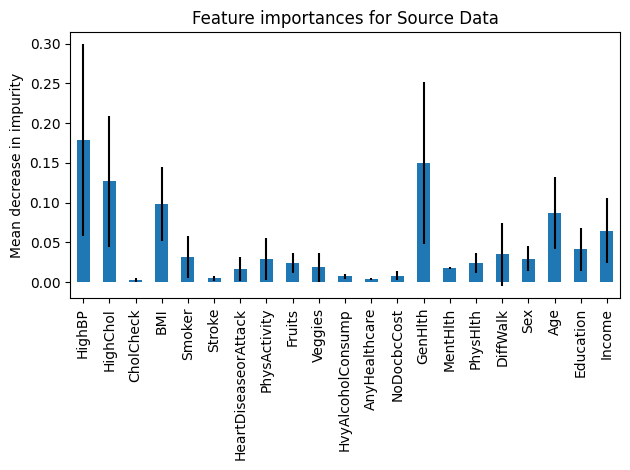

In [25]:
feature_names = X_train_source_sme.columns
importances = rf_target_sme.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_target_sme.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances for Source Data")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Adding Extra Decision Trees to RF Model

#### 4.1 Transfer Learning with Random UnderSampling

In [23]:
rf_source_rus_extra = rf_source_rus

print("Second Training Set (Prediabetes Data) (Class, Count):", sorted(Counter(y_train_target_rus).items()))

rf_source_rus_extra.n_estimators += 100
rf_source_rus_extra.fit(X_train_target_rus, y_train_target_rus)
print("Model Extra Trained on Balanced Prediabetes Data")

print("For the testing set:")
y_pred = rf_source_rus_extra.predict(X_test_target)
print(classification_report(y_test_target, y_pred))

First Training Set (Diabetes Data) (Class, Count): [(0.0, 28233), (1.0, 28233)]
Model Trained on Balanced Diabetes Data
Second Training Set (Prediabetes Data) (Class, Count): [(0.0, 3729), (1.0, 3729)]
Model Extra Trained on Balanced Prediabetes Data
For the testing set:
              precision    recall  f1-score   support

         0.0       0.98      0.68      0.81     21395
         1.0       0.08      0.69      0.15       902

    accuracy                           0.68     22297
   macro avg       0.53      0.69      0.48     22297
weighted avg       0.95      0.68      0.78     22297



#### 4.2 Transfer Learning with SMOTEEN Hybrid Sampling

In [23]:
rf_source_sme_extra = rf_source_sme

print("Second Training Set (Prediabetes Data) (Class, Count):", sorted(Counter(y_train_target_sme).items()))

rf_source_sme_extra.n_estimators += 100
rf_source_sme_extra.fit(X_train_target_sme, y_train_target_sme)
print("Model Extra Trained on Balanced Prediabetes Data")

print("For the testing set:")
y_pred = rf_source_sme_extra.predict(X_test_target)
print(classification_report(y_test_target, y_pred))

First Training Set (Diabetes Data) (Class, Count): [(0.0, 28233), (1.0, 28233)]
Model Trained on Balanced Diabetes Data
Second Training Set (Prediabetes Data) (Class, Count): [(0.0, 3729), (1.0, 3729)]
Model Extra Trained on Balanced Prediabetes Data
For the testing set:
              precision    recall  f1-score   support

         0.0       0.98      0.68      0.81     21395
         1.0       0.08      0.69      0.15       902

    accuracy                           0.68     22297
   macro avg       0.53      0.69      0.48     22297
weighted avg       0.95      0.68      0.78     22297



## Using Source RF Structure

#### 5.1 Transfer Learning with Random UnderSampling

In [ ]:
transfered_rf_rus = RandomForestClassifier(
    max_depth = rf_source_rus.max_depth,
    n_estimators = rf_source_rus.n_estimators,
    random_state = rf_source_rus.random_state
)
transfered_rf_rus.estimators_ = rf_source_rus.estimators_

transfered_rf_rus.fit(X_train_target_rus, y_train_target_rus)

y_pred = transfered_rf_rus.predict(X_test_target)
print('Classification report \n',classification_report(y_test_target, y_pred))

#### 5.2 Transfer Learning with SMOTEENN Hybrid Sampling

In [ ]:
transfered_rf_sme = RandomForestClassifier(
    max_depth = rf_source_sme.max_depth,
    n_estimators = rf_source_sme.n_estimators,
    random_state = rf_source_sme.random_state
)
transfered_rf_sme.estimators_ = rf_source_sme.estimators_

transfered_rf_sme.fit(X_train_target_sme, y_train_target_sme)

y_pred = transfered_rf_sme.predict(X_test_target)
print('Classification report \n',classification_report(y_test_target, y_pred))

## Visualizations

#### RUS Source Tree Examples

In [ ]:
for i in range(6,8):
    tree = rf_source_rus.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train_source_rus.columns,  
                               filled=True,  
                               max_depth=1, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

#### RUS Transferred Tree Examples

In [ ]:
for i in range(6,8):
    tree = transfered_rf_rus.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train_source_rus.columns,  
                               filled=True,  
                               max_depth=1, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

#### Confusion Matrix 1: RUS Target RF Prediction

In [ ]:
y_pred = rf_target_rus.predict(X_test_target)
cm = confusion_matrix(y_test_target, y_pred)
classes = np.unique(y_test_target)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)  # Adjust to fit your needs
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)

# Add labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('RUS Target RF')
plt.show()

#### Confusion Matrix 2: RUS Transferred RF Prediction

In [ ]:
y_pred = transfered_rf_rus.predict(X_test_target)
cm = confusion_matrix(y_test_target, y_pred)
classes = np.unique(y_test_target)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)  # Adjust to fit your needs
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)

# Add labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('RUS Transferred RF')
plt.show()

#### Confusion Matrix 3: SMOTEENN Target RF Prediction

In [ ]:
y_pred = rf_target_sme.predict(X_test_target)
cm = confusion_matrix(y_test_target, y_pred)
classes = np.unique(y_test_target)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)  # Adjust to fit your needs
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)

# Add labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SmoteENN Target RF')
plt.show()

#### Confusion Matrix 4: SMOTEENN Transferred RF Prediction

In [ ]:
y_pred = transfered_rf_sme.predict(X_test_target)
cm = confusion_matrix(y_test_target, y_pred)
classes = np.unique(y_test_target)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)  # Adjust to fit your needs
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)

# Add labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SmoteENN Transferred RF')
plt.show()